# Shark Tank

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](http://abc.go.com/shows/shark-tank) to get a sense of how it works.

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [ ]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file `https://dlsun.github.io/pods/data/sharktank.csv`. Read in the data into a Pandas `DataFrame`.



In [ ]:
df_sharktank = pd.read_csv("https://dlsun.github.io/pods/data/sharktank.csv")
df_sharktank

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,"$100,000",10%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,"$225,000",8%,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,"$300,000",20%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [ ]:
sharks = ["Corcoran",	"Cuban", "Greiner", "Herjavec",	"John",	"O'Leary", "Harrington", "Guest"]

df_sharktank[sharks] = df_sharktank[sharks].fillna(0)
df_sharktank

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,"$100,000",10%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,"$225,000",8%,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,"$300,000",20%,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [ ]:
# Needs to run only once (or it will error out)
df_sharktank['Amount'] = df_sharktank['Amount'].str.replace("[$,]", "", regex=True)
df_sharktank['Equity'] = df_sharktank['Equity'].str.replace("%", "")

In [ ]:
# Needs to run only once (or it will mess up the data)
df_sharktank['Amount'] = (df_sharktank['Amount'].fillna(0)).astype(float)
df_sharktank['Equity'] = (df_sharktank['Equity'].fillna(0)).astype(float) / 100
df_sharktank[['Amount', 'Equity']]

,Amount,Equity
0,50000.0,0.55
1,460000.0,0.50
2,0.0,0.00
3,0.0,0.00
4,0.0,0.00
...,...,...
490,100000.0,0.10
491,225000.0,0.08
492,0.0,0.00
493,300000.0,0.20


## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \$10,000 for a 40% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \$25,000 is \$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

## Most Valuable Company

In [ ]:
df_sharktank['Value'] = (df_sharktank['Amount'].div(df_sharktank['Equity']).replace([np.inf, np.nan], 0)).astype(int)
df_sharktank.loc[421]

Season                                                                 6
No. in series                                                         11
Company                                                             Zipz
Deal                                                                 Yes
Industry                                               Food and Beverage
Entrepreneur Gender                                                 Male
Amount                                                           2.5e+06
Equity                                                               0.1
Corcoran                                                               0
Cuban                                                                  0
Greiner                                                                0
Herjavec                                                               0
John                                                                   0
O'Leary                                            

## Received Largest Total Investment

In [ ]:
df_sharktank.loc[483]

Season                                                                 6
No. in series                                                         27
Company                                                           AirCar
Deal                                                                 Yes
Industry                                                 Green/CleanTech
Entrepreneur Gender                                                 Male
Amount                                                             5e+06
Equity                                                               0.5
Corcoran                                                               0
Cuban                                                                  0
Greiner                                                                0
Herjavec                                                               1
John                                                                   0
O'Leary                                            

**YOUR EXPLANATION HERE**

The company that was most valuable was Zipz for a valuation of \$25,000,000.

This is not the same company that received the largest total investment, that company was AirCar which received a \$5,000,000 investment but for 50% equity which values the company at \$10,000,000.

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

## Get Number of Sharks per Investment

In [ ]:
df_sharktank['Num Sharks'] = (df_sharktank['Corcoran'] + df_sharktank['Cuban'] + 
                                 df_sharktank['Greiner'] + df_sharktank['Herjavec'] +
                                 df_sharktank['John'] + df_sharktank['O\'Leary'] +
                                 df_sharktank['Harrington'] + df_sharktank['Guest'])

## Get Money Invested Per Shark

In [ ]:
# For each shark, check if invested and replace 1.0 with appropriate number of money invested.
for shark in sharks:
  df_sharktank[shark] = df_sharktank.apply(lambda x: x['Amount'] / x['Num Sharks'] if int(x[shark]) == 1 else 0.0, axis=1)

## Get Total for Each Shark

In [ ]:
investor_name = ""
max_invested =  0

# Loop through each investor and grab the sum of their investments
for shark in sharks:
  total = df_sharktank[shark].sum()

  if total > max_invested:
    investor_name = shark
    max_invested = total

print(f"Shark Who Invented The Most: {investor_name}\nAmount Invested: ${max_invested:.2f}")

Shark Who Invented The Most: Cuban
Amount Invested: $17817500.00


There were 3 steps in getting the shark who invested the most over the 6 seasons of Shark Tank. First getting the number of investors per company, then getting the money given per shark and applying it to the already existing shark columns only if the shark invested in the company. After these two steps, getting the total invested per shark resulted in Mark Cuban being the shark who invested the most at a whopping $17,817,500.

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

(-1.25, 1.25, -1.25, 1.25)

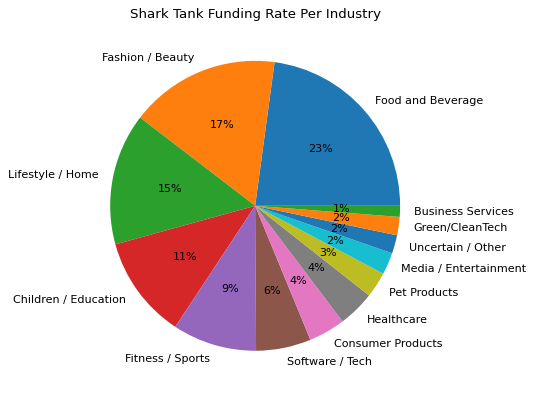

In [ ]:
# Filter dataframe by companies who received funding
df_invested = df_sharktank[df_sharktank['Num Sharks'] > 0]


# Plot proportions into a pie chart
figure(figsize=(10, 6), dpi=80)
df_invested['Industry'].value_counts(normalize=True).plot(title="Shark Tank Funding Rate Per Industry", kind="pie", autopct="%1.0f%%").axis('off')

After filtering out companies who did not receive funding, it is apparent the sharks invested the most in companies under the Food and Beverage, Fashion/Beauty, and Lifestyle/Home industry industries.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2A - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.